In [1]:
import cv2

ModuleNotFoundError: No module named 'cv2'

In [6]:
pip install opencv-python


     |████████████████████████████████| 43.7 MB 42.6 MB/s eta 0:00:01    |█████████████▉                  | 18.9 MB 5.4 MB/s eta 0:00:05     |██████████████████▉             | 25.6 MB 5.4 MB/s eta 0:00:04
Note: you may need to restart the kernel to use updated packages.


In [8]:
import cv2

In [9]:
print(cv2.__version__)

4.3.0


In [7]:
import urllib.request

#Set the url and filename
trumptrudeau_url = "https://cdn.maikoapp.com/3d4b/4quqa/150.jpg"
trumptrudeau_filename = "trumptrudeau.jpg"


urllib.request.urlretrieve(trumptrudeau_url, trumptrudeau_filename) # downloads file as "trumptrudeau.jpg"


('trumptrudeau.jpg', <http.client.HTTPMessage at 0x7f50dbef6320>)

In [9]:
import os
os.listdir(os.curdir)

['environment.yml',
 'trumptrudeau.jpg',
 'Untitled.ipynb',
 'Index.ipynb',
 '.ipynb_checkpoints',
 'apt.txt']

In [10]:
print(trumptrudeau_filename in os.listdir(os.curdir))

True


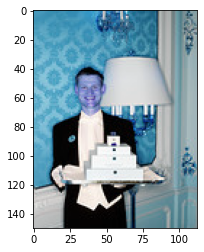

In [11]:
from matplotlib import pyplot as plt
%matplotlib inline

trumptrudeau = cv2.imread(trumptrudeau_filename)

plt.imshow(trumptrudeau)

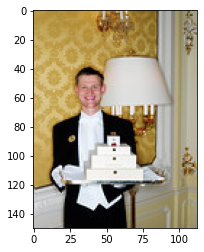

In [12]:
img_corrected = cv2.cvtColor(trumptrudeau, cv2.COLOR_BGR2RGB)

plt.imshow(img_corrected)

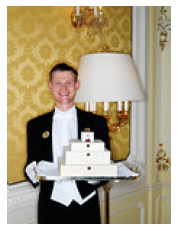

In [13]:
plt.axis("off") #remove axes ticks
plt.imshow(img_corrected)

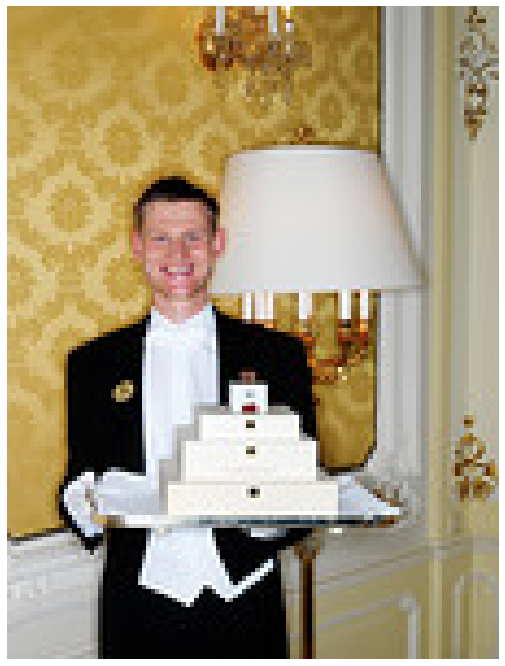

In [14]:
from pylab import rcParams

rcParams['figure.figsize'] = 10, 12

plt.axis("off") #remove axes ticks
plt.imshow(img_corrected)

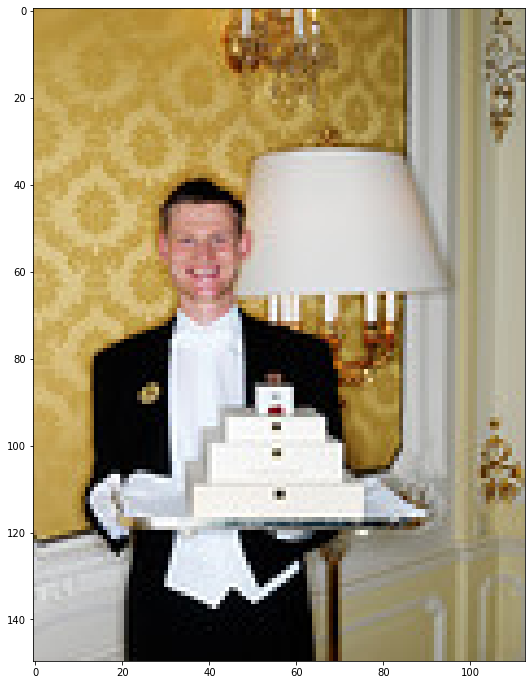

In [15]:
from pylab import rcParams

rcParams['figure.figsize'] = 10, 12

plt.imshow(img_corrected)

Text(0.5, 1.0, 'Grayscale Image')

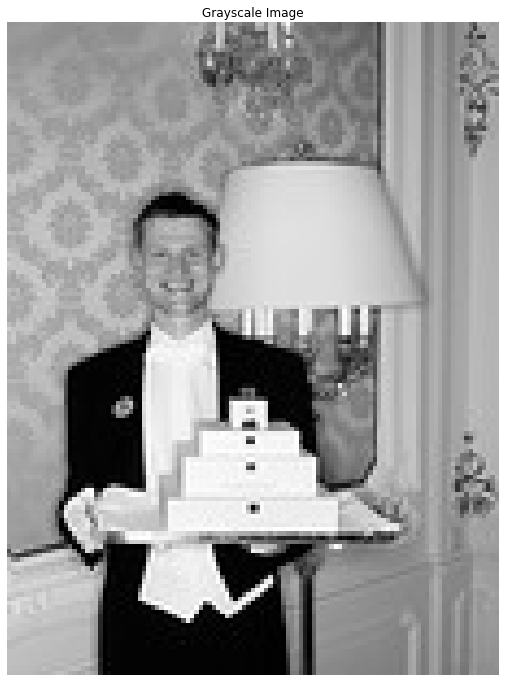

In [16]:
gray_trumptrudeau = cv2.cvtColor(trumptrudeau, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_trumptrudeau, cmap = 'gray')
plt.axis("off") #remove axes ticks
plt.title('Grayscale Image')

(Text(0.5, 1.0, 'Edge Image'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

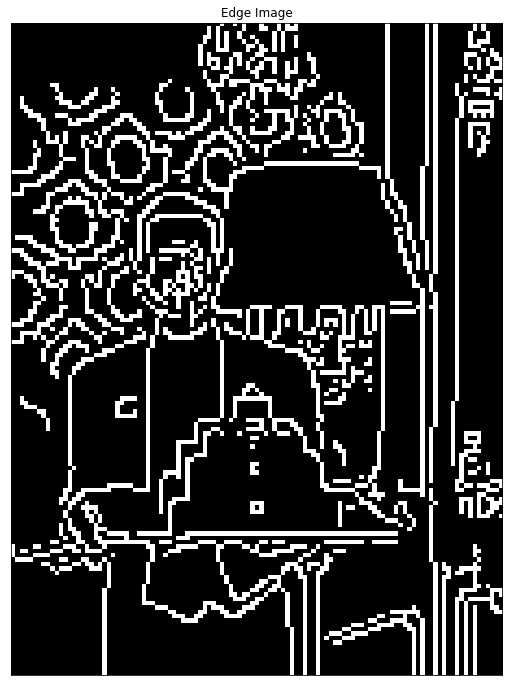

In [17]:
rcParams['figure.figsize'] = 10, 12


edges = cv2.Canny(img_corrected, 
                  threshold1=100, 
                  threshold2=200)

plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Edge Image'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

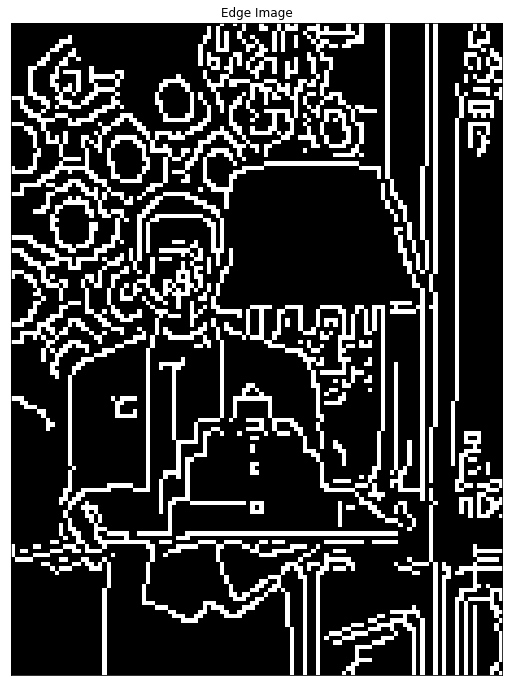

In [18]:
rcParams['figure.figsize'] = 10, 12

edges = cv2.Canny(img_corrected, 
                  threshold1=1,   ## try different values here
                  threshold2=200) ## try different values here

plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Edge Image'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

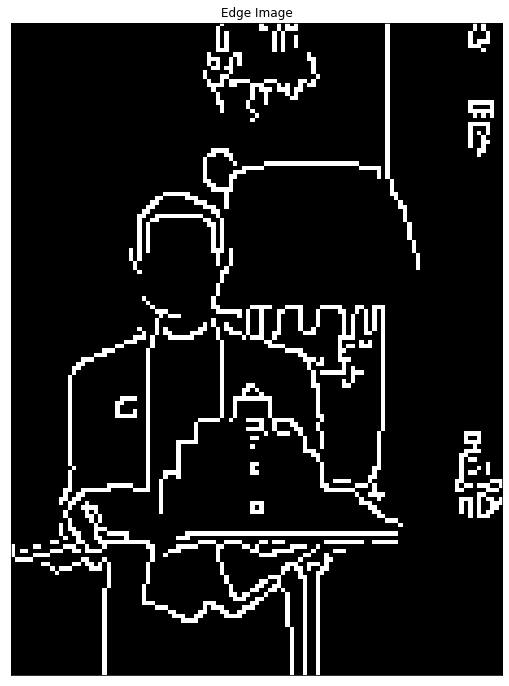

In [19]:
rcParams['figure.figsize'] = 10, 12

edges = cv2.Canny(img_corrected, 
                  threshold1=100,   ## try different values here
                  threshold2=500) ## try different values here

plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

In [20]:
?cv2.Canny

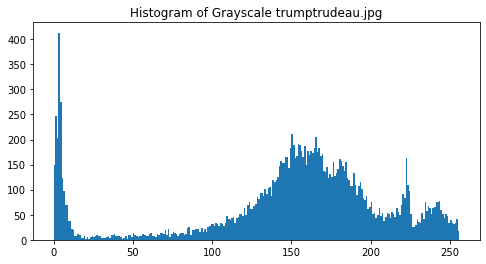

In [21]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

rcParams['figure.figsize'] = 8,4

plt.hist(gray_trumptrudeau.ravel(),256,[0,256])
plt.title('Histogram of Grayscale trumptrudeau.jpg')
plt.show()

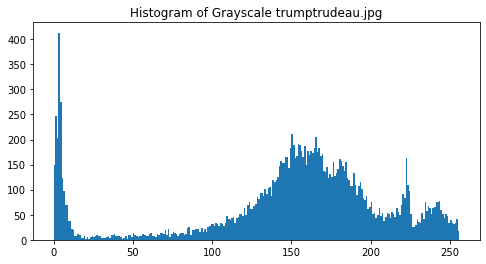

In [22]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

rcParams['figure.figsize'] = 8,4

plt.hist(gray_trumptrudeau.ravel(),256,[0,256])
plt.title('Histogram of Grayscale trumptrudeau.jpg')
plt.show()

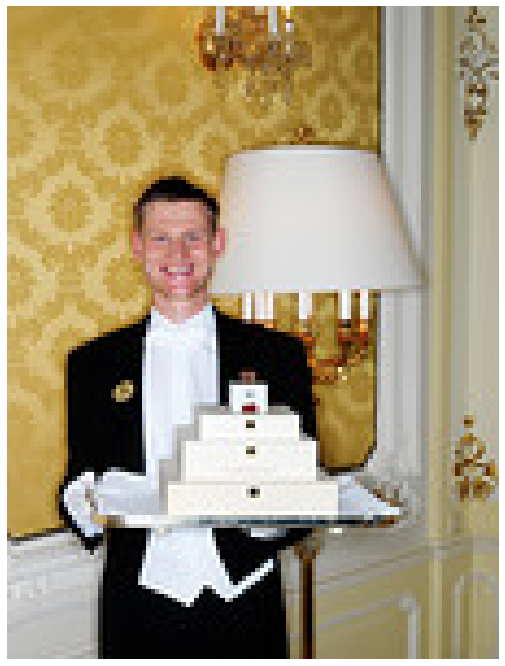

In [23]:
rcParams['figure.figsize'] = 10, 12

plt.axis("off") #remove axes ticks
plt.imshow(img_corrected)

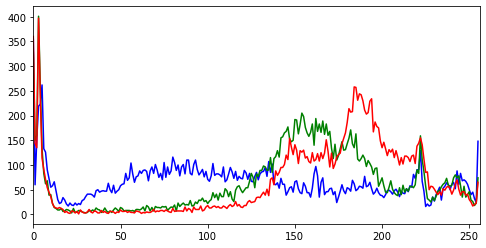

In [24]:
rcParams['figure.figsize'] = 8, 4

color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([trumptrudeau],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [25]:
# importing OpenCV and urllib for downloading and displaying the bunny image
import urllib.request
import cv2
bunny_image_url = "http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Dataset/bunny.png"
urllib.request.urlretrieve(bunny_image_url, "bunny.png") # downloads file as "bunny.png"
im = cv2.imread("bunny.png")

In [26]:
# loading standard python modules
import os
import math
import matplotlib.pyplot as plt
%matplotlib inline

Original size of bunny's image is: 630 Kilo Bytes


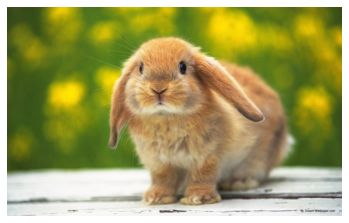

In [27]:
# We read a bunny image here and display it
img_corrected = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img_corrected)
print("Original size of bunny's image is: {} Kilo Bytes".format(str(math.ceil((os.stat('bunny.png').st_size)/1000))))

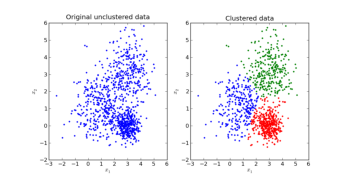

In [28]:
k_means_url = "http://i.stack.imgur.com/cIDB3.png"
urllib.request.urlretrieve(k_means_url, "K_Means_clustering.png") # downloads file as "K_Means_clustering.png"
k_means_im = cv2.imread("K_Means_clustering.png")
k_means_im_corrected = cv2.cvtColor(k_means_im, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(k_means_im_corrected)

In [29]:
from sklearn.cluster import KMeans

In [30]:
# Extracting num_rows and num_cols from bunny's image (stored in im variable)
num_rows = im.shape[0]
num_cols = im.shape[1]
transform_image_for_KMeans = im.reshape(num_rows * num_cols, 3)

In [31]:
# Perform KMeans to compress image, here K = 8 clusters
kmeans = KMeans(n_clusters=8)
kmeans.fit(transform_image_for_KMeans)

cluster_centroids = np.asarray(kmeans.cluster_centers_,dtype=np.uint8) 

# labels represent the label of each pixel and which cluster it belongs to
labels = np.asarray(kmeans.labels_,dtype=np.uint8 )  
labels = labels.reshape(num_rows,num_cols);    

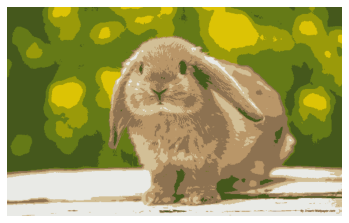

In [32]:
compressed_image = np.ones((num_rows, num_cols, 3), dtype=np.uint8)
for r in range(num_rows):
    for c in range(num_cols):
        compressed_image[r, c, :] = cluster_centroids[labels[r, c], :]

cv2.imwrite("compressed_bunny.png", compressed_image)
compressed_bunny_im = cv2.imread("compressed_bunny.png")
compressed_bunny_im_corrected = cv2.cvtColor(compressed_bunny_im, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(compressed_bunny_im_corrected)    

In [33]:
print("Compressed size of bunny's image is: {} Kilo Bytes".format(str(math.ceil((os.stat('compressed_bunny.png').st_size)/1000))))

Compressed size of bunny's image is: 48 Kilo Bytes


In [16]:
!pip install --upgrade pytesseract wget


Requirement already up-to-date: pytesseract in /srv/conda/envs/notebook/lib/python3.6/site-packages (0.3.4)
Requirement already up-to-date: wget in /srv/conda/envs/notebook/lib/python3.6/site-packages (3.2)


In [17]:
# Loading the required python modules
import pytesseract
import matplotlib.pyplot as plt
import cv2
import glob
import os

In [18]:
import wget, zipfile, os

filename='license-plates'

if not os.path.isfile(filename):
    filename = wget.download('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Dataset/license-plates.zip')
    with zipfile.ZipFile("license-plates.zip","r") as zip_ref:
        zip_ref.extractall()

In [15]:
path_for_license_plates = os.getcwd() + "/license-plates/**/*.jpg"
list_license_plates = []
predicted_license_plates = []

for path_to_license_plate in glob.glob(path_for_license_plates, recursive=True):
    
    license_plate_file = path_to_license_plate.split("/")[-1]
    license_plate, _ = os.path.splitext(license_plate_file)
    '''
    Here we append the actual license plate to a list
    '''
    list_license_plates.append(license_plate)
    
    '''
    Read each license plate image file using openCV
    '''
    img = cv2.imread(path_to_license_plate)
    
    '''
    We then pass each license plate image file to the Tesseract OCR engine using 
    the Python library wrapper for it. We get back a predicted_result for the license plate.
    We append the predicted_result in a list and compare it with the original the license plate
    '''
    predicted_result = pytesseract.image_to_string(img, lang='eng',
    config='--oem 3 --psm 6 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
    
    filter_predicted_result = "".join(predicted_result.split()).replace(":", "").replace("-", "")
    predicted_license_plates.append(filter_predicted_result)

TesseractNotFoundError: tesseract is not installed or it's not in your PATH

In [19]:
print("Actual License Plate", "\t", "Predicted License Plate", "\t", "Accuracy")
print("--------------------", "\t", "-----------------------", "\t", "--------")

def calculate_predicted_accuracy(actual_list, predicted_list):
    for actual_plate, predict_plate in zip(actual_list, predicted_list):
        accuracy = "0%"
        num_matches = 0
        if actual_plate == predict_plate:
            accuracy = "100%"
        else:
            if len(actual_plate) == len(predict_plate):
                for a, p in zip(actual_plate, predict_plate):
                    if a == p:
                        num_matches += 1
                accuracy = str(round((num_matches/len(actual_plate)), 2) * 100)
                accuracy += "%"
        print("     ", actual_plate, "\t\t\t", predict_plate, "\t\t  ", accuracy)

        
calculate_predicted_accuracy(list_license_plates, predicted_license_plates)

Actual License Plate 	 Predicted License Plate 	 Accuracy
-------------------- 	 ----------------------- 	 --------


In [20]:
Image resizing is a technique in which we scale the image either horizontally, or vertically or both.  
Further documentation on image resizing: [here](https://www.tutorialkart.com/opencv/python/opencv-python-resize-image/)

For our use case, we will read the license plate file of ```GWT2180``` using ```cv2.imread``` and then resize the image file by a factor of 2x in both the horizontal and vertical directions using ```cv2.resize```

SyntaxError: invalid syntax (<ipython-input-20-b87227335c6c>, line 1)

Text(0.5, 1.0, 'GWT2180 license plate')

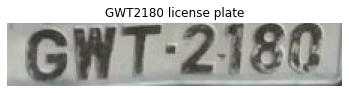

In [21]:
# Read the license plate file and display it
test_license_plate = cv2.imread(os.getcwd() + "/license-plates/GWT2180.jpg")
plt.imshow(test_license_plate)
plt.axis('off')
plt.title('GWT2180 license plate')

In [22]:
resize_test_license_plate = cv2.resize(test_license_plate, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

In [23]:
grayscale_resize_test_license_plate = cv2.cvtColor(resize_test_license_plate, cv2.COLOR_BGR2GRAY)

In [24]:
gaussian_blur_license_plate = cv2.GaussianBlur(grayscale_resize_test_license_plate, (5, 5), 0)

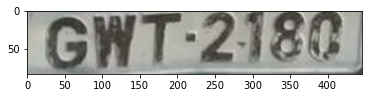

In [25]:
plt.imshow(resize_test_license_plate)


In [27]:
plt.imshow(grayscale_test_license_plate)


NameError: name 'grayscale_test_license_plate' is not defined

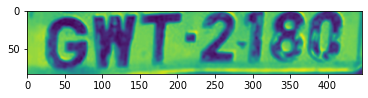

In [28]:
plt.imshow(gaussian_blur_license_plate)


In [29]:
new_predicted_result_GWT2180 = pytesseract.image_to_string(gaussian_blur_license_plate, lang='eng',
config='--oem 3 -l eng --psm 6 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
filter_new_predicted_result_GWT2180 = "".join(new_predicted_result_GWT2180.split()).replace(":", "").replace("-", "")
print(filter_new_predicted_result_GWT2180)

TesseractNotFoundError: tesseract is not installed or it's not in your PATH